<a href="https://colab.research.google.com/github/msaqib015/Physiotherapy_Recovery_Analysis/blob/main/Physiotherapy_Recovery_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
import numpy as np
import pandas as pd

# Generate dataset
np.random.seed(42)
data = {
    "Patient_ID": range(1, 501),
    "Age": np.random.randint(18, 80, size=500),
    "Gender": np.random.choice(["Male", "Female"], size=500),
    "Injury_Type": np.random.choice(["Sprain", "Fracture", "Post-Surgery"], size=500),
    "Treatment_Type": np.random.choice(["Manual Therapy", "Electrotherapy", "Exercise Therapy"], size=500),
    "Number_of_Sessions": np.random.randint(5, 20, size=500),
    "Recovery_Time_Days": np.random.randint(10, 120, size=500)
}
df = pd.DataFrame(data)
df.to_csv("Physiotherapy_Recovery_Data.csv", index=False)
print("Dataset created!")


Dataset created!


In [3]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Physiotherapy_Recovery_Data.csv")

# Encode categorical variables
encoder = LabelEncoder()
df["Gender_Encoded"] = encoder.fit_transform(df["Gender"])
df["Injury_Type_Encoded"] = encoder.fit_transform(df["Injury_Type"])
df["Treatment_Type_Encoded"] = encoder.fit_transform(df["Treatment_Type"])

# Check the first few rows
print(df.head())


   Patient_ID  Age  Gender   Injury_Type    Treatment_Type  \
0           1   56  Female      Fracture    Electrotherapy   
1           2   69    Male      Fracture  Exercise Therapy   
2           3   46  Female      Fracture    Electrotherapy   
3           4   32    Male      Fracture  Exercise Therapy   
4           5   60    Male  Post-Surgery    Manual Therapy   

   Number_of_Sessions  Recovery_Time_Days  Gender_Encoded  \
0                  15                  46               0   
1                  15                  29               1   
2                  13                  35               0   
3                  17                  38               1   
4                  15                  10               1   

   Injury_Type_Encoded  Treatment_Type_Encoded  
0                    0                       0  
1                    0                       1  
2                    0                       0  
3                    0                       1  
4              

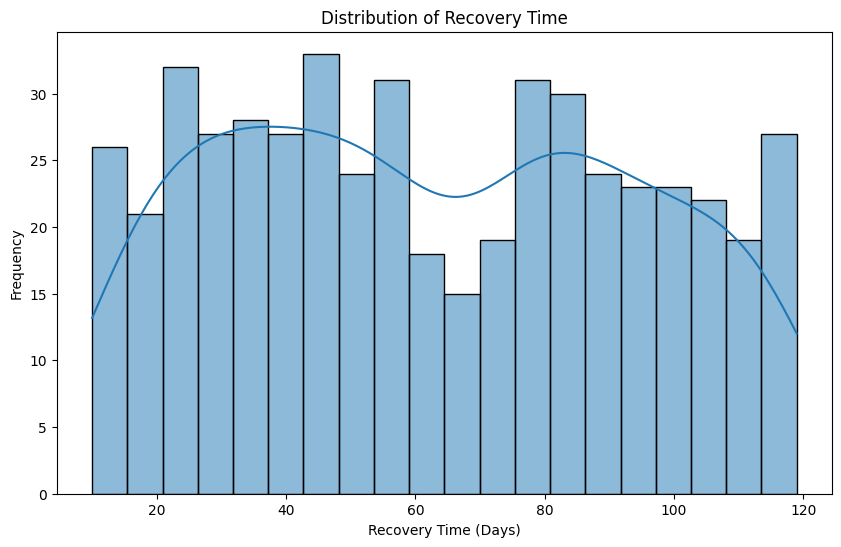

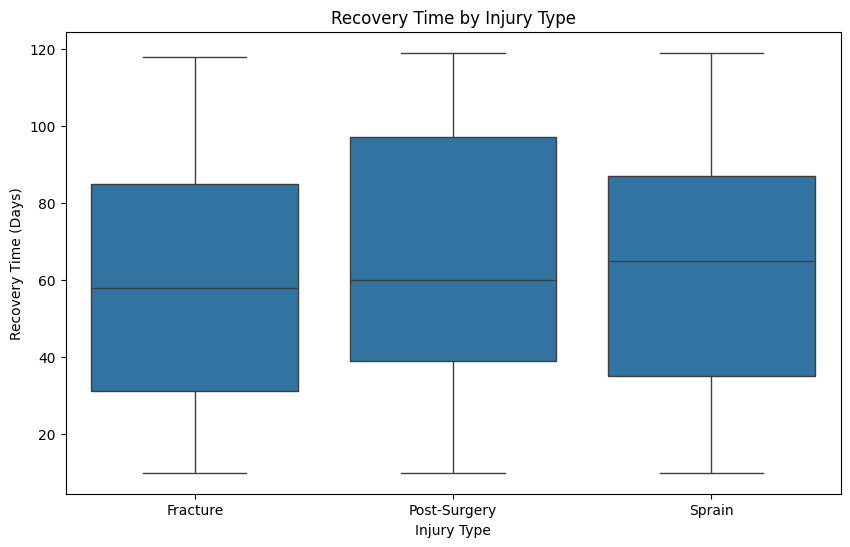

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of recovery times
plt.figure(figsize=(10, 6))
sns.histplot(df["Recovery_Time_Days"], kde=True, bins=20)
plt.title("Distribution of Recovery Time")
plt.xlabel("Recovery Time (Days)")
plt.ylabel("Frequency")
plt.show()

# Boxplot of recovery time by injury type
plt.figure(figsize=(10, 6))
sns.boxplot(x="Injury_Type", y="Recovery_Time_Days", data=df)
plt.title("Recovery Time by Injury Type")
plt.xlabel("Injury Type")
plt.ylabel("Recovery Time (Days)")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target
features = ["Age", "Gender_Encoded", "Injury_Type_Encoded", "Treatment_Type_Encoded", "Number_of_Sessions"]
X = df[features]
y = df["Recovery_Time_Days"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 31.66


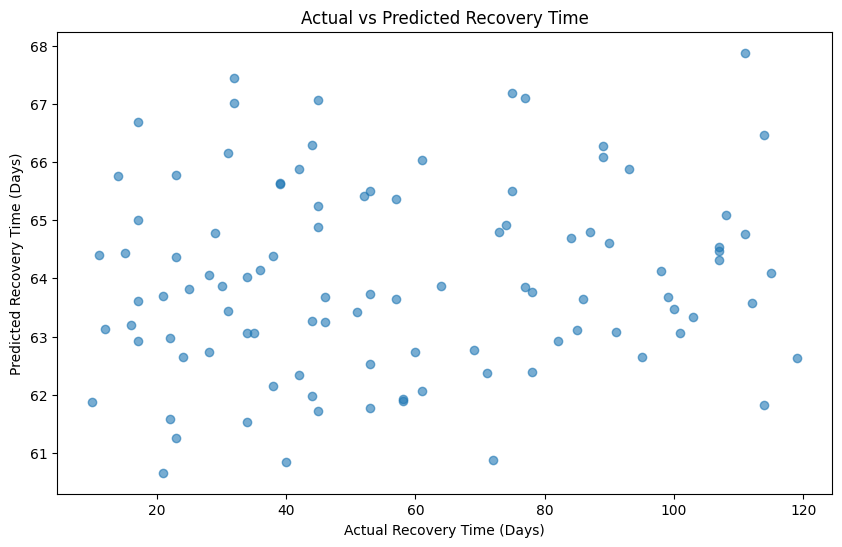

In [6]:
# Scatter plot of actual vs predicted recovery times
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title("Actual vs Predicted Recovery Time")
plt.xlabel("Actual Recovery Time (Days)")
plt.ylabel("Predicted Recovery Time (Days)")
plt.show()
